In [1]:
import pandas as pd
df = pd.read_csv('/Users/pankajverma/Desktop/summerInternship2k17/GSoC/Ensembl/1.lncRNA/ML/ML_file.csv')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df.head(3)

,Gene stable ID,output
0,ENSG00000237797,0
1,ENSG00000233387,0
2,ENSG00000280953,0


In [4]:
df_features_file = pd.read_csv('/Users/pankajverma/Desktop/summerInternship2k17/GSoC/Ensembl/1.lncRNA/feature_selection/protein_and_other_overlap_v10/other_overlap_v10.csv', index_col=0)

In [5]:
df_features_file.head(3)

,ENS lincRNA gene ID,Ref lncRNA gene ID,Chr region,No. of transcripts in lincrna,No. of transcripts in lncrna,ENS-Ref Overlap ?,same_opp_overlap,Overlap Length,No. ENS lincrna Exons which overlap RefSeq exons,Max ORF length(ENS),...,Inflated overlap 0.5kb ref(lnc)-ref(lnc),Max exon count,Max exon length,Ens ID for seq alignment score,Ref ID for seq alignment score,Seq Alignment Score,ens(linc)-ens(protein-coding) overlap ?,ref(lnc)-ref(protein-coding) overlap ?,ens(linc)-ens(other) overlap ?,ref(lnc)-ref(other) overlap ?
0,ENSG00000236648,gene-LOC107984028,1,1,4,Yes,1,17270,3,90,...,1,4,308,ENST00000430540,rna-XR_002958657.1,560.0,1,1,1,1
1,ENSG00000230704,gene-LOC101928628,1,1,1,Yes,1,1720,2,36,...,1,2,677,ENST00000454271,rna-XR_241147.3,677.0,0,1,0,1
2,ENSG00000230699,gene-LOC284600,1,1,1,Yes,1,3348,1,18,...,1,1,2838,ENST00000448179,rna-XR_002958526.1,2877.0,1,1,0,1


In [6]:
ens_all_ids = df['Gene stable ID'].tolist()

In [7]:
set_ens_all_ids = set(ens_all_ids)

In [8]:
from tqdm import tqdm

In [9]:
drop_index = []
drop_values = 0
for i in tqdm(range(len(df_features_file))):
    if df_features_file['ENS lincRNA gene ID'][i] in set_ens_all_ids:
        continue
    else:
        drop_index.append(i)
        drop_values = drop_values + 1

100%|██████████| 4557/4557 [00:00<00:00, 56409.79it/s]


In [10]:
df_features_file.drop(drop_index, axis=0,inplace=True)
df_features_file.reset_index(drop=True, inplace=True)

In [11]:
len(df_features_file)

635

In [12]:
neg_ids = []
pos_ids = []
for i in range(len(df)):
    if df['output'][i] == 0:
        neg_ids.append(df['Gene stable ID'][i])
    else:
        pos_ids.append(df["Gene stable ID"][i])

In [13]:
set_neg_ids = set(neg_ids)
set_pos_ids = set(pos_ids)

In [14]:
feature_output = []
for i in range(len(df_features_file)):
    feature_output.append('-')

In [15]:
no_pos = 0
no_neg = 0
for i in tqdm(range(len(df_features_file))):
    if df_features_file['ENS lincRNA gene ID'][i] in set_neg_ids:
        feature_output[i] = 0
        no_neg = no_neg + 1
    elif df_features_file['ENS lincRNA gene ID'][i] in set_pos_ids:
        feature_output[i] = 1
        no_pos = no_pos + 1

100%|██████████| 635/635 [00:00<00:00, 28358.30it/s]


In [16]:
no_neg

277

In [17]:
no_pos

358

In [18]:
# feature_output

In [18]:
df_features_file['output'] = feature_output

In [19]:
df_features_file["Max No. of amino acids(ENS)"] = pd.to_numeric(df_features_file["Max No. of amino acids(ENS)"])
df_features_file["Max No. of amino acids(REF)"] = pd.to_numeric(df_features_file["Max No. of amino acids(REF)"])

In [20]:
df_features_file['Overlap Length'] = pd.to_numeric(df_features_file['Overlap Length'])

In [21]:
df_features_file.to_csv('/Users/pankajverma/Desktop/summerInternship2k17/GSoC/Ensembl/1.lncRNA/ML/ens_ref_feature_and_output_v10.csv')

In [22]:
df_features_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 38 columns):
ENS lincRNA gene ID                                   635 non-null object
Ref lncRNA gene ID                                    635 non-null object
Chr region                                            635 non-null object
No. of transcripts in lincrna                         635 non-null int64
No. of transcripts in lncrna                          635 non-null int64
ENS-Ref Overlap ?                                     635 non-null object
same_opp_overlap                                      635 non-null int64
Overlap Length                                        635 non-null int64
No. ENS lincrna Exons which overlap RefSeq exons      635 non-null int64
Max ORF length(ENS)                                   635 non-null int64
Max No. of amino acids(ENS)                           635 non-null int64
Max Transcript Index for ORF(ENS)                     635 non-null int64
GC % of trans r

In [23]:
df_features_file.describe()

,No. of transcripts in lincrna,No. of transcripts in lncrna,same_opp_overlap,Overlap Length,No. ENS lincrna Exons which overlap RefSeq exons,Max ORF length(ENS),Max No. of amino acids(ENS),Max Transcript Index for ORF(ENS),GC % of trans row having Max ORF(ENS),Max ORF length(REF),...,Inflated overlap 0.5kb ens(linc)-ens(linc),Inflated overlap 0.5kb ref(lnc)-ref(lnc),Max exon count,Max exon length,Seq Alignment Score,ens(linc)-ens(protein-coding) overlap ?,ref(lnc)-ref(protein-coding) overlap ?,ens(linc)-ens(other) overlap ?,ref(lnc)-ref(other) overlap ?,output
count,635.000000,635.000000,635.0,6.350000e+02,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,...,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,1.859843,1.971654,1.0,6.159747e+04,3.929134,88.973228,29.699213,5519.333858,46.799906,84.283465,...,0.902362,0.825197,3.103937,825.250394,852.418898,0.913386,0.888189,0.855118,0.894488,0.563780
std,2.237664,2.328499,0.0,3.146373e+05,4.880563,98.035374,32.664858,3680.545087,6.822537,99.927915,...,0.297058,0.380098,2.034071,896.618517,845.997592,0.281491,0.315382,0.352259,0.307454,0.496306
min,1.000000,1.000000,1.0,5.800000e+01,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.0,2.853000e+03,2.000000,24.000000,8.000000,934.000000,42.580000,27.000000,...,1.000000,1.000000,2.000000,316.500000,409.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.0,1.203800e+04,3.000000,60.000000,20.000000,7116.000000,46.810000,54.000000,...,1.000000,1.000000,3.000000,531.000000,571.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.0,3.697950e+04,5.000000,120.000000,40.000000,7664.000000,51.235000,108.000000,...,1.000000,1.000000,4.000000,972.500000,968.500000,1.000000,1.000000,1.000000,1.000000,1.000000
max,23.000000,23.000000,1.0,7.402980e+06,61.000000,891.000000,297.000000,13249.000000,65.480000,891.000000,...,1.000000,1.000000,12.000000,6744.000000,6744.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
print(df_features_file.columns.values)

['ENS lincRNA gene ID' 'Ref lncRNA gene ID' 'Chr region'
 'No. of transcripts in lincrna' 'No. of transcripts in lncrna'
 'ENS-Ref Overlap ?' 'same_opp_overlap' 'Overlap Length'
 'No. ENS lincrna Exons which overlap RefSeq exons' 'Max ORF length(ENS)'
 'Max No. of amino acids(ENS)' 'Max Transcript Index for ORF(ENS)'
 'GC % of trans row having Max ORF(ENS)' 'Max ORF Sequence(ENS)'
 'Max ORF length(REF)' 'Max No. of amino acids(REF)'
 'Max Transcript Index for ORF(REF)'
 'GC % of trans row having Max ORF(REF)' 'Max ORF Sequence(REF)'
 'HGNC ID refseq lncrna?' 'HGNC ID ensembl lincrna?'
 'HGNC ID refseq lncrna?(corrected)' 'HGNC ID ensembl lincrna?(corrected)'
 'Inflated overlap 1kb ens(linc)-ens(protein_coding)' 'is ref LOC ?'
 'Inflated overlap 1kb ref(lnc)-ref(protein_coding)'
 'Inflated overlap 0.5kb ens(linc)-ens(linc)'
 'Inflated overlap 0.5kb ref(lnc)-ref(lnc)' 'Max exon count'
 'Max exon length' 'Ens ID for seq alignment score'
 'Ref ID for seq alignment score' 'Seq Alignment Sco

In [25]:
df_features_file_without_ids = df_features_file.drop(['ENS lincRNA gene ID', 'Ref lncRNA gene ID','Chr region', 'ENS-Ref Overlap ?', 'same_opp_overlap', 'Max Transcript Index for ORF(ENS)', 'Max ORF Sequence(ENS)', 'Max Transcript Index for ORF(REF)', 'Max ORF Sequence(REF)','HGNC ID refseq lncrna?', 'HGNC ID ensembl lincrna?','Ens ID for seq alignment score', 'Ref ID for seq alignment score'], axis=1)

In [26]:
df_features_file_without_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 25 columns):
No. of transcripts in lincrna                         635 non-null int64
No. of transcripts in lncrna                          635 non-null int64
Overlap Length                                        635 non-null int64
No. ENS lincrna Exons which overlap RefSeq exons      635 non-null int64
Max ORF length(ENS)                                   635 non-null int64
Max No. of amino acids(ENS)                           635 non-null int64
GC % of trans row having Max ORF(ENS)                 635 non-null float64
Max ORF length(REF)                                   635 non-null int64
Max No. of amino acids(REF)                           635 non-null int64
GC % of trans row having Max ORF(REF)                 635 non-null float64
HGNC ID refseq lncrna?(corrected)                     635 non-null int64
HGNC ID ensembl lincrna?(corrected)                   635 non-null int64
Inflated overla

In [29]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.scatter(df_features_file['Overlap Length'],df_features_file['output'])
# plt.show()

In [27]:
df_features_file_without_ids.corr(method ='pearson')

,No. of transcripts in lincrna,No. of transcripts in lncrna,Overlap Length,No. ENS lincrna Exons which overlap RefSeq exons,Max ORF length(ENS),Max No. of amino acids(ENS),GC % of trans row having Max ORF(ENS),Max ORF length(REF),Max No. of amino acids(REF),GC % of trans row having Max ORF(REF),...,Inflated overlap 0.5kb ens(linc)-ens(linc),Inflated overlap 0.5kb ref(lnc)-ref(lnc),Max exon count,Max exon length,Seq Alignment Score,ens(linc)-ens(protein-coding) overlap ?,ref(lnc)-ref(protein-coding) overlap ?,ens(linc)-ens(other) overlap ?,ref(lnc)-ref(other) overlap ?,output
No. of transcripts in lincrna,1.000000,0.046158,0.281301,0.638175,0.181374,0.181076,0.027154,-0.039938,-0.039939,-0.105474,...,-0.075196,-0.017724,0.330337,0.005065,-0.041838,-0.162037,0.002344,-0.211898,-0.012359,-0.099167
No. of transcripts in lncrna,0.046158,1.000000,0.395705,0.138337,-0.006754,-0.006997,0.024153,0.101878,0.101839,0.065174,...,-0.019970,-0.026993,0.086875,-0.071032,-0.041258,-0.114447,-0.186887,-0.024245,-0.138580,-0.055757
Overlap Length,0.281301,0.395705,1.000000,0.397760,0.036638,0.036457,0.002872,-0.010239,-0.010256,-0.038654,...,-0.108533,-0.095525,0.171835,0.000908,-0.012104,-0.006052,0.005903,-0.135011,-0.122111,0.047431
No. ENS lincrna Exons which overlap RefSeq exons,0.638175,0.138337,0.397760,1.000000,0.130915,0.130315,0.043797,-0.044082,-0.044113,-0.090220,...,0.028946,0.004365,0.628645,0.190950,0.132971,0.016191,0.078871,-0.030752,0.072794,0.161730
Max ORF length(ENS),0.181374,-0.006754,0.036638,0.130915,1.000000,0.999820,0.181190,0.493554,0.493587,0.107099,...,0.037173,0.034795,0.102841,0.121943,0.109371,-0.003514,0.040255,0.008154,-0.018200,0.013764
Max No. of amino acids(ENS),0.181076,-0.006997,0.036457,0.130315,0.999820,1.000000,0.174084,0.493745,0.493778,0.108490,...,0.034030,0.035394,0.101647,0.121022,0.108344,-0.003181,0.038834,0.007173,-0.017771,0.012617
GC % of trans row having Max ORF(ENS),0.027154,0.024153,0.002872,0.043797,0.181190,0.174084,1.000000,0.130147,0.130109,0.601985,...,0.036363,0.053792,0.030378,0.016539,0.011882,-0.069905,-0.007797,-0.024801,0.007763,-0.021966
Max ORF length(REF),-0.039938,0.101878,-0.010239,-0.044082,0.493554,0.493745,0.130147,1.000000,0.999999,0.167668,...,-0.006186,0.030749,-0.050398,0.113243,0.095356,0.015846,-0.053045,0.008338,0.028852,-0.023264
Max No. of amino acids(REF),-0.039939,0.101839,-0.010256,-0.044113,0.493587,0.493778,0.130109,0.999999,1.000000,0.167680,...,-0.006208,0.030627,-0.050434,0.113170,0.095276,0.015875,-0.053011,0.008332,0.028884,-0.023371
GC % of trans row having Max ORF(REF),-0.105474,0.065174,-0.038654,-0.090220,0.107099,0.108490,0.601985,0.167668,0.167680,1.000000,...,-0.028252,0.077433,-0.159455,0.000900,-0.005378,-0.169600,-0.112857,-0.026243,0.072312,-0.104658


In [28]:
df_features_file_without_ids.corr(method ='pearson').to_csv("/Users/pankajverma/Desktop/summerInternship2k17/GSoC/Ensembl/1.lncRNA/ML/corr_matrix.csv")

In [29]:
print(df_features_file_without_ids.groupby('output').size())

output
0    277
1    358
dtype: int64


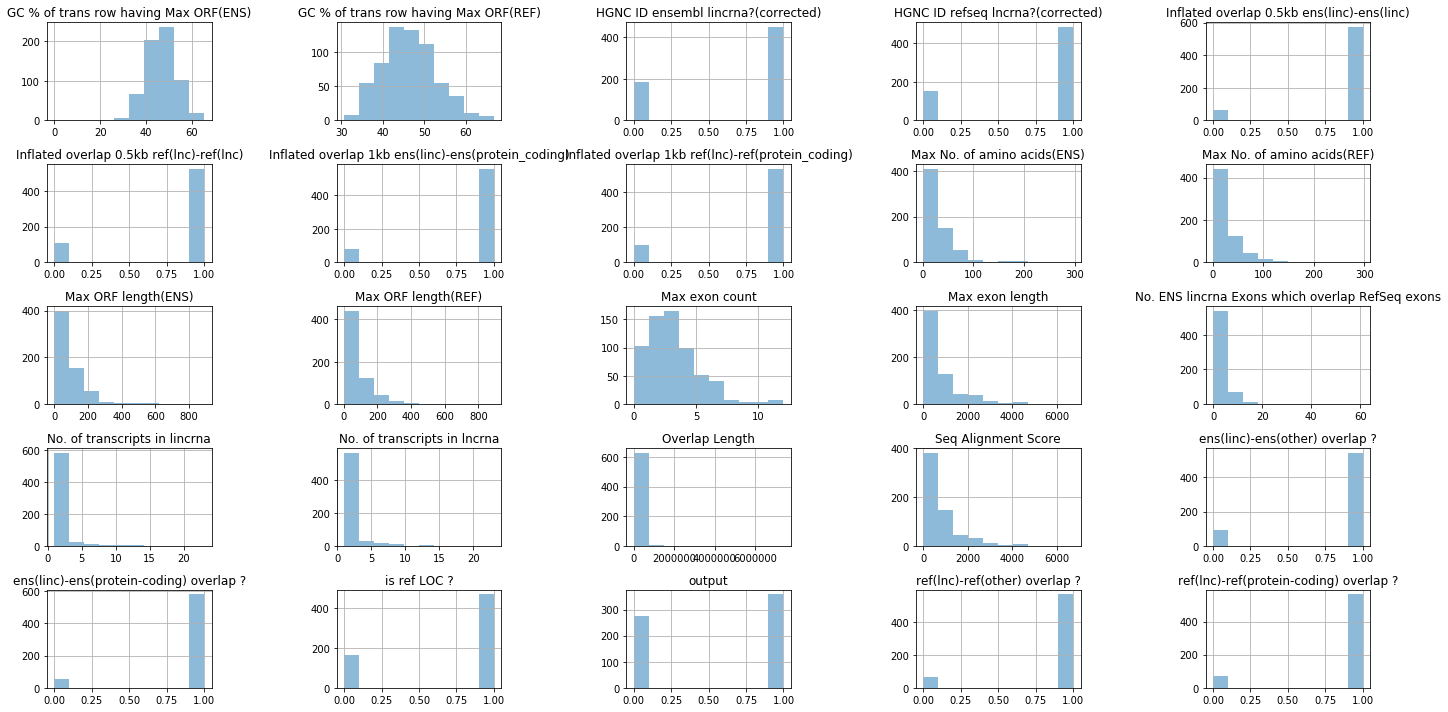

In [30]:
df_features_file_without_ids.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.savefig('/Users/pankajverma/Desktop/summerInternship2k17/GSoC/Ensembl/1.lncRNA/ML/feature_histograms.png')
plt.show()

In [31]:
df_features_file_without_ids.head(3)

,No. of transcripts in lincrna,No. of transcripts in lncrna,Overlap Length,No. ENS lincrna Exons which overlap RefSeq exons,Max ORF length(ENS),Max No. of amino acids(ENS),GC % of trans row having Max ORF(ENS),Max ORF length(REF),Max No. of amino acids(REF),GC % of trans row having Max ORF(REF),...,Inflated overlap 0.5kb ens(linc)-ens(linc),Inflated overlap 0.5kb ref(lnc)-ref(lnc),Max exon count,Max exon length,Seq Alignment Score,ens(linc)-ens(protein-coding) overlap ?,ref(lnc)-ref(protein-coding) overlap ?,ens(linc)-ens(other) overlap ?,ref(lnc)-ref(other) overlap ?,output
0,1,4,17270,3,90,30,51.97,231,77,49.57,...,1,1,4,308,560.0,1,1,1,1,1
1,1,1,1720,2,36,12,40.92,9,3,39.04,...,1,1,2,677,677.0,0,1,0,1,0
2,1,1,3348,1,18,6,59.68,27,9,59.80,...,0,1,1,2838,2877.0,1,1,0,1,0


In [32]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [33]:
df_features_file_without_ids.head(2)

,No. of transcripts in lincrna,No. of transcripts in lncrna,Overlap Length,No. ENS lincrna Exons which overlap RefSeq exons,Max ORF length(ENS),Max No. of amino acids(ENS),GC % of trans row having Max ORF(ENS),Max ORF length(REF),Max No. of amino acids(REF),GC % of trans row having Max ORF(REF),...,Inflated overlap 0.5kb ens(linc)-ens(linc),Inflated overlap 0.5kb ref(lnc)-ref(lnc),Max exon count,Max exon length,Seq Alignment Score,ens(linc)-ens(protein-coding) overlap ?,ref(lnc)-ref(protein-coding) overlap ?,ens(linc)-ens(other) overlap ?,ref(lnc)-ref(other) overlap ?,output
0,1,4,17270,3,90,30,51.97,231,77,49.57,...,1,1,4,308,560.0,1,1,1,1,1
1,1,1,1720,2,36,12,40.92,9,3,39.04,...,1,1,2,677,677.0,0,1,0,1,0


In [34]:
# Split-out validation dataset
array = df_features_file_without_ids.values
X = array[:,0:24]
Y = array[:,24]
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [36]:
X.shape

(635, 24)

In [37]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
len(df_features_file_without_ids)

635

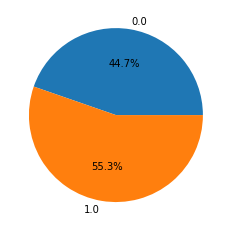

In [39]:
import numpy as np
labels = list(set(y_train))
counts = []
for label in labels:
    counts.append(np.count_nonzero(y_train == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [40]:
classifiers = [
    MultinomialNB(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 12),
    DummyClassifier(),
    MLPClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

MultinomialNB
****Results****
Accuracy: 44.0945%
Log Loss: 18.97895755725433
GaussianNB
****Results****
Accuracy: 39.3701%
Log Loss: 1.1246454241613497
KNeighborsClassifier
****Results****
Accuracy: 59.8425%
Log Loss: 0.6267542417915402
DummyClassifier
****Results****
Accuracy: 58.2677%
Log Loss: 18.22124423983477


/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier
****Results****
Accuracy: 74.8031%
Log Loss: 5.890436061692182
XGBClassifier
****Results****
Accuracy: 88.9764%
Log Loss: 0.2668887191950747
KNeighborsClassifier
****Results****
Accuracy: 66.9291%
Log Loss: 2.934232243236678
LogisticRegression
****Results****
Accuracy: 85.8268%
Log Loss: 0.3826243349538736
SVC
****Results****
Accuracy: 60.6299%
Log Loss: 0.6762123847235687


/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/s

SVC
****Results****
Accuracy: 60.6299%
Log Loss: 0.676199750619549
NuSVC
****Results****
Accuracy: 60.6299%
Log Loss: 0.6761080783261727
DecisionTreeClassifier
****Results****
Accuracy: 86.6142%
Log Loss: 4.623300777271509
RandomForestClassifier
****Results****
Accuracy: 88.1890%
Log Loss: 0.7943741581248497


/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier
****Results****
Accuracy: 89.7638%
Log Loss: 0.6482360593376485
GradientBoostingClassifier
****Results****
Accuracy: 89.7638%
Log Loss: 0.2538450346491799
GaussianNB
****Results****
Accuracy: 39.3701%
Log Loss: 1.1246454241613497
LinearDiscriminantAnalysis
****Results****
Accuracy: 85.0394%
Log Loss: 0.31251176869782193
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 40.1575%
Log Loss: 20.647895457368975


/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


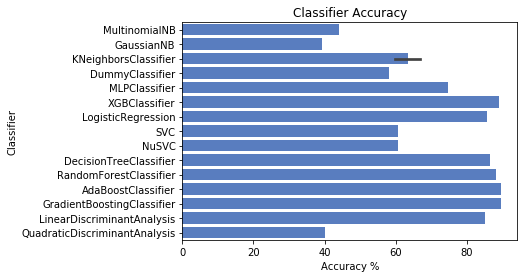

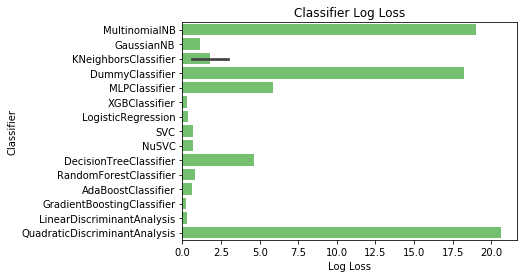

In [41]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [42]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [43]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.814745 (0.035657)
LDA: 0.816824 (0.037900)
KNN: 0.584784 (0.067929)
CART: 0.824784 (0.027044)
NB: 0.468549 (0.057646)
SVM: 0.553020 (0.038745)
XGB: 0.874078 (0.039316)


/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/l

LR: 0.814745 (0.035657)


/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

RF: 0.854235 (0.053055)
ADB: 0.844471 (0.027088)
GBC: 0.870039 (0.037706)


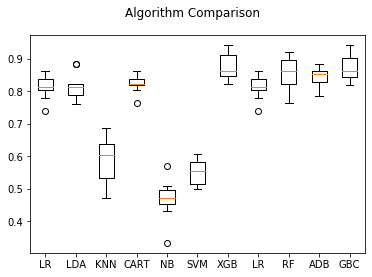

In [44]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
# Make predictions on test dataset
abc = XGBClassifier()
abc.fit(X_train, y_train)
predictions = abc.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.889763779527559
[[41  9]
 [ 5 72]]
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85        50
         1.0       0.89      0.94      0.91        77

    accuracy                           0.89       127
   macro avg       0.89      0.88      0.88       127
weighted avg       0.89      0.89      0.89       127



In [83]:
# predictions

In [66]:
X_train.shape

(508, 22)

In [67]:
y_train.shape

(508,)

In [68]:
Y_train = to_categorical(y_train)

In [69]:
Y_test = to_categorical(y_test)

In [70]:
from keras.models import Sequential 
from keras.layers import LSTM 

from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [71]:
input_dim = len(df_features_file_without_ids.columns) - 1

model = Sequential()
model.add(Dense(8, input_dim = input_dim , activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, Y_train, epochs = 20, batch_size = 5)

scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

W0812 01:34:19.366375 4361696704 deprecation.py:323] From /Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0812 01:34:19.826577 4361696704 deprecation_wrapper.py:119] From /Users/pankajverma/anaconda3/envs/gsoc_ensembl/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/20
508/508 [==============================] - 1s 2ms/step - loss: 8.9157 - acc: 0.4469
Epoch 2/20
508/508 [==============================] - 0s 766us/step - loss: 8.9157 - acc: 0.4469
Epoch 3/20
508/508 [==============================] - 0s 871us/step - loss: 8.9157 - acc: 0.4469
Epoch 4/20
508/508 [==============================] - 0s 685us/step - loss: 8.9157 - acc: 0.4469
Epoch 5/20
508/508 [==============================] - 0s 732us/step - loss: 8.9157 - acc: 0.4469
Epoch 6/20
508/508 [==============================] - 0s 669us/step - loss: 8.9157 - acc: 0.4469
Epoch 7/20
508/508 [==============================] - 0s 759us/step - loss: 8.9157 - acc: 0.4469
Epoch 8/20
508/508 [==============================] - 0s 697us/step - loss: 8.9157 - acc: 0.4469
Epoch 9/20
508/508 [==============================] - 0s 753us/step - loss: 8.9157 - acc: 0.4469
Epoch 10/20
508/508 [==============================] - 0s 753us/step - loss: 8.9157 - acc: 0.4469
Epoch 11/20
508/508 [==========

In [73]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
# X = dataset[:,0:8]
# y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=22, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, Y, epochs=15, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/15
635/635 [==============================] - 2s 3ms/step - loss: 9.0871 - acc: 0.4362
Epoch 2/15
635/635 [==============================] - 0s 757us/step - loss: 9.0871 - acc: 0.4362
Epoch 3/15
635/635 [==============================] - 0s 513us/step - loss: 9.0871 - acc: 0.4362
Epoch 4/15
635/635 [==============================] - 0s 482us/step - loss: 9.0871 - acc: 0.4362
Epoch 5/15
635/635 [==============================] - 0s 580us/step - loss: 9.0871 - acc: 0.4362
Epoch 6/15
635/635 [==============================] - 0s 418us/step - loss: 9.0871 - acc: 0.4362
Epoch 7/15
635/635 [==============================] - 0s 395us/step - loss: 9.0871 - acc: 0.4362
Epoch 8/15
635/635 [==============================] - 0s 330us/step - loss: 9.0871 - acc: 0.4362
Epoch 9/15
635/635 [==============================] - 0s 399us/step - loss: 9.0871 - acc: 0.4362
Epoch 10/15
635/635 [==============================] - 0s 521us/step - loss: 9.0871 - acc: 0.4362
Epoch 11/15
635/635 [==========